Module 5 Challenge – Pymaceuticals
William Davis | william.c.davis@nasa.gov
----
Summary Analysis
•	The final tumor volume was notably lower for mice on the Capomulin and Ramicane drug regimens compared to those on Infubinol and Ceftamin.
•	An analysis of tumor volume for Mouse b128 showed a tumor volume reduction from 45 to 39 mm3.
•	There is a good correlation (~84%) between tumor volume and mouse weight for those mice on the Capomulin drug regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import display, Javascript

%matplotlib widget

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Display the data tables for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Display the data tables for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
study_data_all = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_data_all.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [5]:
# Checking the number of mice.
study_data_all["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = study_data_all.loc[study_data_all.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data_all[study_data_all["Mouse ID"] != "g989"]
study_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [8]:
# Checking the number of mice in the clean DataFrame.
study_data_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_data_by_regimen = study_data_cleaned.set_index(["Drug Regimen"])
study_data_by_regimen.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1


In [10]:
# Use groupby and summary statistical methods to calculate the mean of the tumor volume.
tumor_mean = study_data_by_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Use groupby and summary statistical methods to calculate the median of the tumor volume.
tumor_median = study_data_by_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Use groupby and summary statistical methods to calculate the variance of the tumor volume.
tumor_var = study_data_by_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Use groupby and summary statistical methods to calculate the standard deviation of the tumor volume.
tumor_std = study_data_by_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Use groupby and summary statistical methods to calculate the SEM of the tumor volume.
tumor_sem = study_data_by_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Assemble the resulting series into a single summary DataFrame.
study_data_summary = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis=1,
                               keys=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",
                                     "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."])
study_data_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

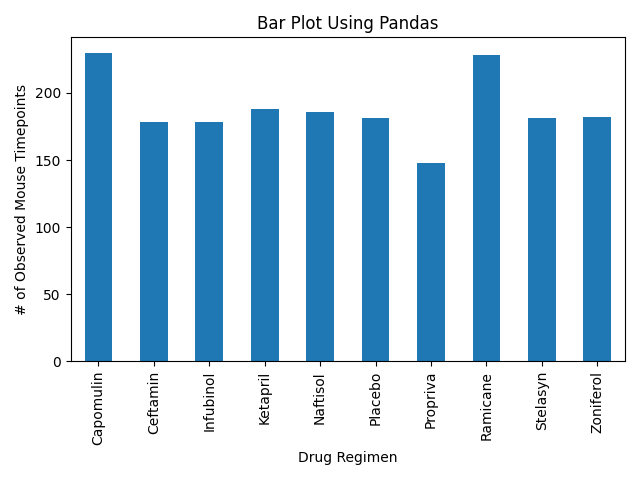

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure()
bar_pandas = study_data_cleaned.groupby(["Drug Regimen"])["Timepoint"].count()
graph_pandas = bar_pandas.plot(kind="bar")
graph_pandas.set_title("Bar Plot Using Pandas")
graph_pandas.set_xlabel("Drug Regimen")
graph_pandas.set_ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.savefig("bar_plot_using_pandas.png")
plt.show()

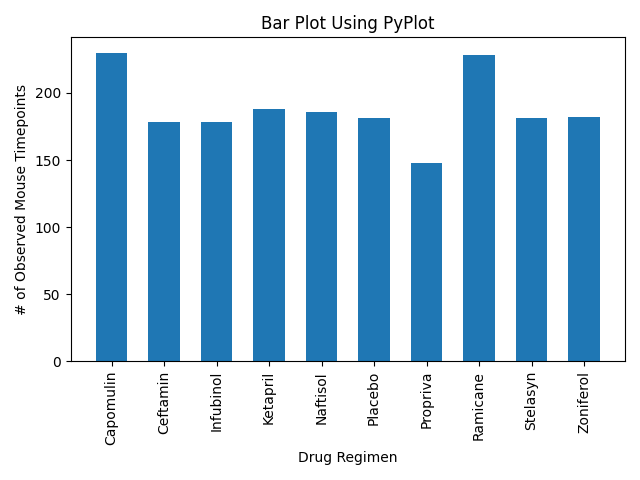

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure()
x_axis_pyplot = study_data_cleaned["Drug Regimen"].unique()
x_axis_pyplot.sort()
y_axis_pyplot = study_data_cleaned.groupby(["Drug Regimen"])["Timepoint"].count()
plt.bar(x_axis_pyplot, y_axis_pyplot, alpha=1, width=0.6, align="center")
plt.title("Bar Plot Using PyPlot")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = "vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.savefig("bar_plot_using_pyplot.png")
plt.show()

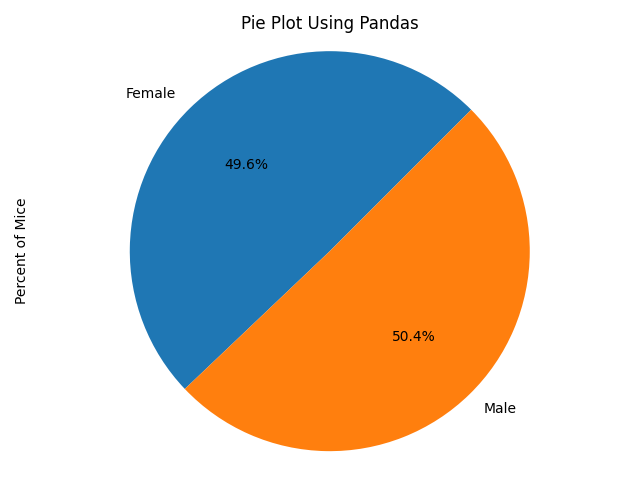

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
study_data_by_sex = study_data_cleaned.set_index(["Sex"])
mice_by_gender = study_data_by_sex.groupby(["Sex"])["Mouse ID"].nunique()

plt.figure()
pie_pandas = mice_by_gender
pie_pandas = pie_pandas.plot(kind="pie", startangle=45, autopct="%1.1f%%")
pie_pandas.set_title("Pie Plot Using Pandas")
plt.ylabel("Percent of Mice")
plt.axis("equal")
plt.tight_layout()
plt.savefig("pie_plot_using_pandas.png")
plt.show()

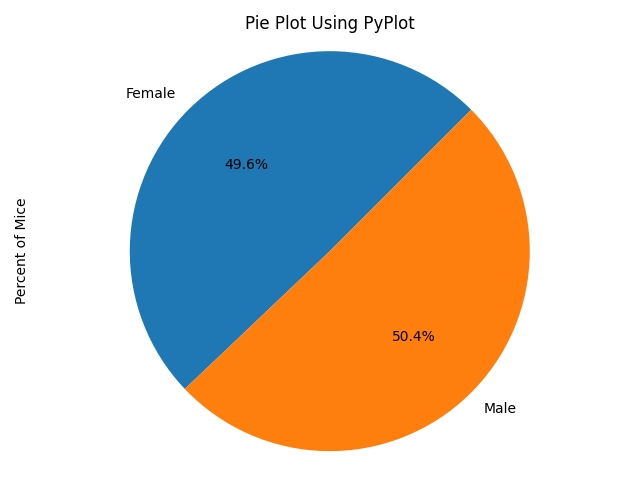

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure()
x_axis_pyplot = study_data_cleaned["Drug Regimen"].unique()
x_axis_pyplot.sort()
y_axis_pyplot = study_data_cleaned.groupby(["Drug Regimen"])["Timepoint"].count()
plt.pie(mice_by_gender, labels=["Female", "Male"], startangle=45, autopct="%1.1f%%")
plt.title("Pie Plot Using PyPlot")
plt.ylabel("Percent of Mice")
plt.axis("equal")
plt.tight_layout()
plt.savefig("pie_plot_using_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_at_last_timepoint = pd.merge(last_timepoint, study_data_cleaned, on=["Mouse ID", "Timepoint"], how="left")
tumor_at_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_at_last_timepoint.loc[tumor_at_last_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    final_tumor_vol.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Values below {lower_bound} are outliers.")
    print(f"Values above {upper_bound} are outliers.")
    if len(outliers) == 0:
        print(f"{drug} has no outlier values.")
    else:
        print(f"{drug}'s outlier values include: {outliers}")
    print(f"-----")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 are outliers.
Values above 51.83201549 are outliers.
Capomulin has no outlier values.
-----
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 are outliers.
Values above 54.30681135 are outliers.
Ramicane has no outlier values.
-----
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 are outliers.
Values above 82.74144559000001 are outliers.
Infubinol's outlier values include: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The inter

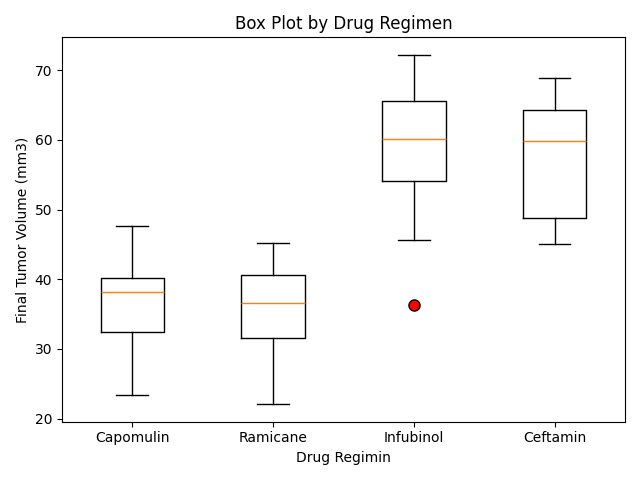

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(final_tumor_vol, tick_labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title("Box Plot by Drug Regimen")
plt.xlabel("Drug Regimin")
plt.ylabel("Final Tumor Volume (mm3)")
plt.tight_layout()
plt.savefig("box_plot_by_drug_regimen.png")
plt.show()

## Line and Scatter Plots

In [23]:
# Isolate a single mouse treated by Capomulin and build a dataframe for that mouse
capomulin_mice = study_data_cleaned.copy()
capomulin_mouse_b128 = capomulin_mice[(capomulin_mice["Drug Regimen"] == "Capomulin") & (capomulin_mice["Mouse ID"] == "b128")]
capomulin_mouse_b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,0,45.000000,0
175,b128,Capomulin,Female,9,22,5,45.651331,0
176,b128,Capomulin,Female,9,22,10,43.270852,0
177,b128,Capomulin,Female,9,22,15,43.784893,0
178,b128,Capomulin,Female,9,22,20,42.731552,0
179,b128,Capomulin,Female,9,22,25,43.262145,1
180,b128,Capomulin,Female,9,22,30,40.605335,1
181,b128,Capomulin,Female,9,22,35,37.967644,1
182,b128,Capomulin,Female,9,22,40,38.379726,2
183,b128,Capomulin,Female,9,22,45,38.982878,2


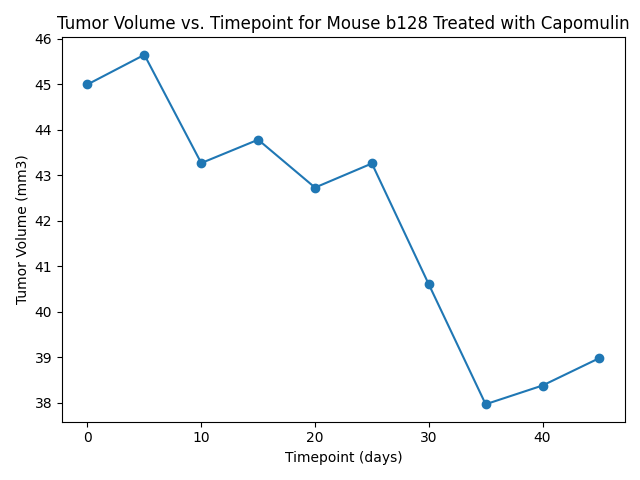

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure()
x_axis_timepoint = capomulin_mouse_b128["Timepoint"]
y_axis_tumor_vol = capomulin_mouse_b128["Tumor Volume (mm3)"]
plt.plot(x_axis_timepoint, y_axis_tumor_vol, marker="o")
plt.title("Tumor Volume vs. Timepoint for Mouse b128 Treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.savefig("line_plot_tumor_vol_vs_timepoint.png")
plt.show()

In [25]:
# Isolate those mice treated by Capomulin and build a dataframe for those mice
capomulin_mouse_all = capomulin_mice[(capomulin_mice["Drug Regimen"] == "Capomulin")]
capomulin_mouse_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,0,45.000000,0
175,b128,Capomulin,Female,9,22,5,45.651331,0
176,b128,Capomulin,Female,9,22,10,43.270852,0
177,b128,Capomulin,Female,9,22,15,43.784893,0
178,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1831,y793,Capomulin,Male,17,17,25,38.992734,2
1832,y793,Capomulin,Male,17,17,30,35.726023,2
1833,y793,Capomulin,Male,17,17,35,36.327870,2
1834,y793,Capomulin,Male,17,17,40,31.475411,2


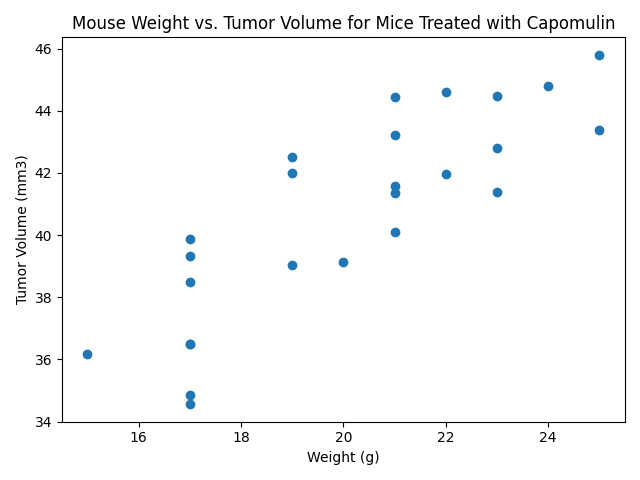

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure()
x_axis_weight = capomulin_mouse_all.groupby(["Mouse ID"])["Weight (g)"].max()
y_axis_tumor_vol = capomulin_mouse_all.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis_weight, y_axis_tumor_vol, marker="o")
plt.title("Mouse Weight vs. Tumor Volume for Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.savefig("scatter_plot_mouse_weight_vs_tumor_vol.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


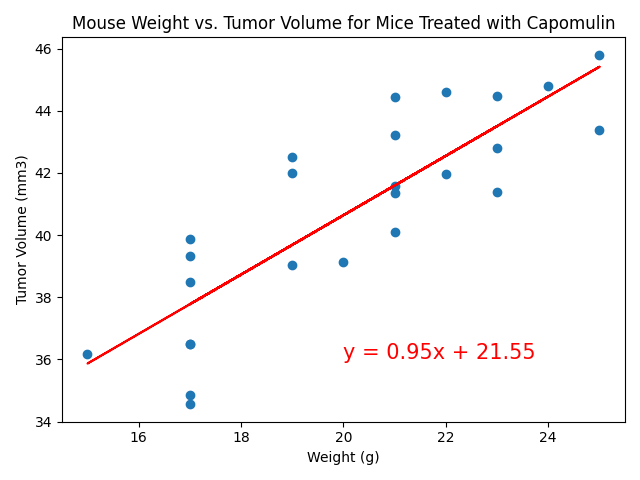

In [29]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(x_axis_weight, y_axis_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_weight, y_axis_tumor_vol)
regress_values = x_axis_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_axis_weight, y_axis_tumor_vol, marker="o")
plt.plot(x_axis_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight vs. Tumor Volume for Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.savefig("scatter_plot_mouse_weight_vs_tumor_vol_regression.png")
plt.show()